# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, how="outer", on = "Mouse ID")

# Display the data table for preview
mouse_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
len(mouse_metadata['Mouse ID'].value_counts())


249

In [21]:
duplicate_mice = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicate_mice.unique()

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mouse_data.loc[mouse_data['Mouse ID'] != 'g989']

clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [24]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mouse_groupby = mouse_df.groupby(['Drug Regimen'])
drug_df = pd.DataFrame()
drug_df['Mean Tumor Volume'] = mouse_groupby['Tumor Volume (mm3)'].mean()
drug_df['Median Tumor Volume'] = mouse_groupby['Tumor Volume (mm3)'].median()
drug_df['Tumor Volume Variance'] = mouse_groupby['Tumor Volume (mm3)'].var()
drug_df['Tumor Volume Standard Dev.'] = mouse_groupby['Tumor Volume (mm3)'].std()
drug_df['Tumor Volume SEM'] = mouse_groupby['Tumor Volume (mm3)'].sem()
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Timepoints'>

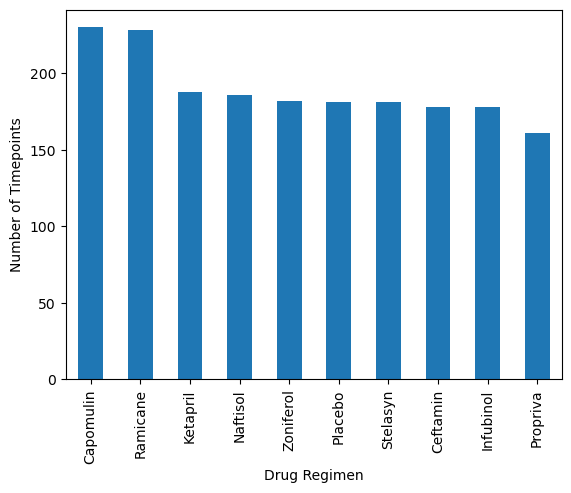

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
figure_1 = mouse_groupby['Mouse ID'].count().sort_values(ascending = False).plot(kind = 'bar', ylabel = 'Number of Timepoints')
figure_1

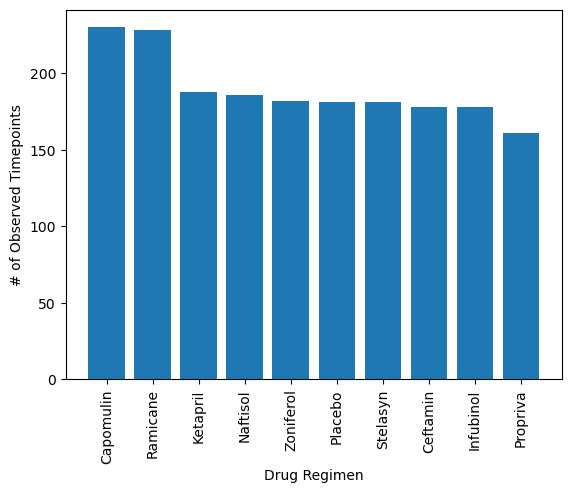

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_bar_plt = mouse_groupby['Mouse ID'].count().sort_values(ascending = False).reset_index()
x_axis = mouse_bar_plt['Drug Regimen']
y_axis = mouse_bar_plt['Mouse ID']
plt.bar(x_axis, y_axis)
plt.ylabel('# of Observed Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='Sex'>

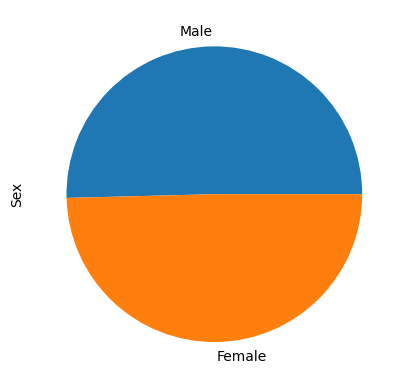

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = clean_df['Sex'].value_counts()
label = clean_df['Sex'].unique()

data.plot.pie(y=label)

([<matplotlib.patches.Wedge at 0x132c0f210>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

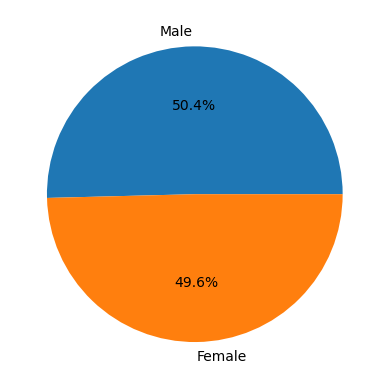

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(data,autopct="%1.1f%%",labels = label)

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_df = mouse_df.groupby('Mouse ID')
mouse_id_groupby = mouse_id_df['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_df_2 = pd.merge(mouse_df, mouse_id_groupby, how = 'inner', on = ['Mouse ID', 'Timepoint'])
mouse_df_2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR 
for treatment in treatments:
    
   
    mice = mouse_df_2.loc[mouse_df_2['Drug Regimen'] == treatment]
    tumor_volume.append(mice['Tumor Volume (mm3)'])
  
    quartiles = mice['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    
    
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lowerb = lowerq - 1.5*iqr
    upperb = upperq + 1.5*iqr
    outlier_row = mice[(mice['Tumor Volume (mm3)'] > upperb) | (mice['Tumor Volume (mm3)'] < lowerb)]
    outliers = [x for x in outlier_row['Mouse ID']]
    outlier_tumor_vol = [x for x in outlier_row['Tumor Volume (mm3)']]
    print(F"The outliers of {treatment} are mice {outliers} with tumor volumes (mm3) of {outlier_tumor_vol} respectively.")

The outliers of Capomulin are mice [] with tumor volumes (mm3) of [] respectively.
The outliers of Ramicane are mice [] with tumor volumes (mm3) of [] respectively.
The outliers of Infubinol are mice ['c326'] with tumor volumes (mm3) of [36.3213458] respectively.
The outliers of Ceftamin are mice [] with tumor volumes (mm3) of [] respectively.


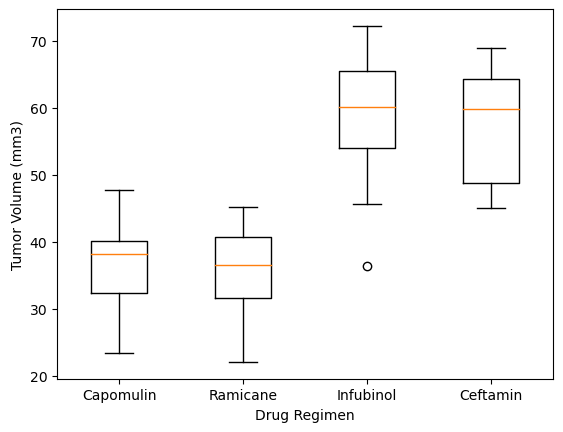

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume)
xticks = [1, 2, 3, 4]
plt.xticks(ticks = xticks, labels = treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

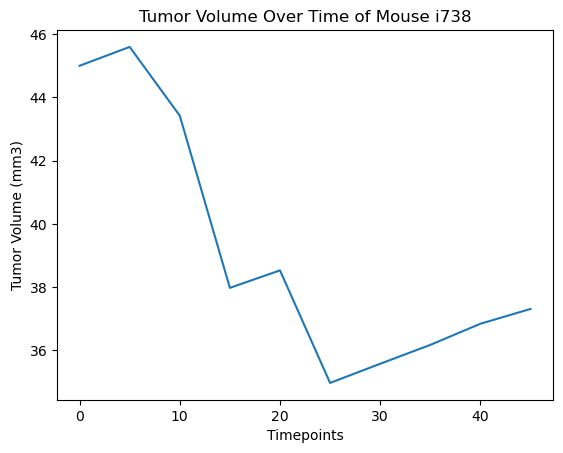

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

tv_vs_tp = mouse_df.loc[mouse_df['Mouse ID'] == 'i738']
plt.plot(mouse_i738['Timepoint'], mouse_i738['Tumor Volume (mm3)'])
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time of Mouse i738')
plt.show()


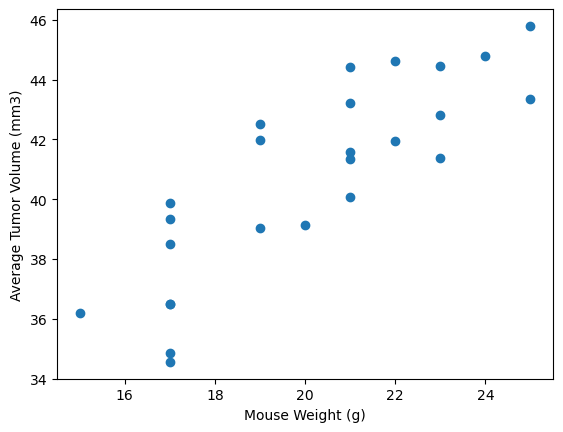

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mice = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']
Capomulin_mice_g = Capomulin_mice.groupby(['Mouse ID'])
x_axis = Capomulin_mice_g['Weight (g)'].mean()
y_axis = Capomulin_mice_g['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis, y_axis)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84 .


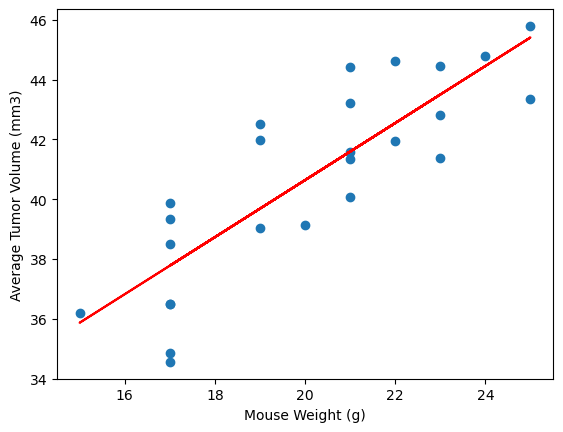

In [50]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

linearregression = st.linregress(x_axis, y_axis)
slope = linearregression[0]
intercept = linearregression[1]
regress_values = x_axis * slope + intercept #mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and tumor volume is {round(linearregression[2], 2)} .")